<a href="https://colab.research.google.com/github/chrisseiler96/Movie-Data-Infographic-Generator/blob/master/Movie_Data_Infographic_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install colorthief
!wget https://m.media-amazon.com/images/M/MV5BMTYyNzEyNDAzOV5BMl5BanBnXkFtZTgwNTk3NDczNjM@._V1_UX182_CR0,0,182,268_AL_.jpg

import PIL 
from colorthief import ColorThief
from IPython.core.display import display, HTML

color_thief = ColorThief("MV5BMTYyNzEyNDAzOV5BMl5BanBnXkFtZTgwNTk3NDczNjM@._V1_UX182_CR0,0,182,268_AL_.jpg")
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

d_palette = {}
hex_palette = []
for p in palette:
  d_palette[((p[0] * 299) + (p[1] * 587) + (p[2] * 114)) / 1000] = "#{:02X}{:02X}{:02X}".format(p[0], p[1], p[2])  
for key in d_palette:
  hex_palette.append(d_palette[key])

for i in range(1, len(hex_palette)):
  display(HTML('<h1 style="background-color:{}; color:{}">Hello, world!</h1>'.format(hex_palette[0], hex_palette[-i])))

--2018-12-14 18:26:41--  https://m.media-amazon.com/images/M/MV5BMTYyNzEyNDAzOV5BMl5BanBnXkFtZTgwNTk3NDczNjM@._V1_UX182_CR0,0,182,268_AL_.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 13.32.115.37
Connecting to m.media-amazon.com (m.media-amazon.com)|13.32.115.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13942 (14K) [image/jpeg]
Saving to: ‘MV5BMTYyNzEyNDAzOV5BMl5BanBnXkFtZTgwNTk3NDczNjM@._V1_UX182_CR0,0,182,268_AL_.jpg’

MV5BMTYyNzEyNDAzOV5 100%[===================>]  13.62K  --.-KB/s    in 0s      

2018-12-14 18:26:41 (286 MB/s) - ‘MV5BMTYyNzEyNDAzOV5BMl5BanBnXkFtZTgwNTk3NDczNjM@._V1_UX182_CR0,0,182,268_AL_.jpg’ saved [13942/13942]



In [0]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup
from urllib.request import urlopen as uReq
import math
import nltk
from IPython.display import Image, display
from PIL import Image, ImageDraw, ImageFont
from IPython import display
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import yaml
import re


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

!wget https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg
!wget https://www.wfonts.com/download/data/2015/11/17/aroly/AROLY.ttf
!wget https://github.com/Talor-A/fonts/raw/master/A/Aventura-Bold.otf
!wget https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png
!wget https://911media.com/wp-content/uploads/2017/10/rotten-tomatoes-logo.png
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/DIMIS___.otf
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/5a1ad63ef0be1.png
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/DIMITRI_.otf
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/c6fefc208b.png
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/dark_logo.png
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/coin_PNG36943.png
!wget https://github.com/chrisseiler96/AB-Demo/raw/master/eb3456959c.png



sid = SentimentIntensityAnalyzer()



def imdb_url_generator(Movie_title):
    Movie_title = Movie_title.replace(' ', '+')
    url = urljoin('http://www.omdbapi.com/','?t=' + Movie_title +'&apikey=a0b7d886&')
  
def url_to_title(url):
    url = url.replace('https://www.rottentomatoes.com/m/','')
    url = url.replace('_',' ')
    return url

def get_imdb_review_count(url):
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    page_soup = BeautifulSoup(page_html, "html.parser")
    reviewCount = page_soup.findAll("div",{'class':'header'})
    reviewCount = str(reviewCount)
    badParser = reviewCount.find("Reviews</span")
    reviewCount = reviewCount[:badParser]
    worseParser = (reviewCount.find("n>")+2)
    reviewCount = reviewCount[worseParser:]
    reviewCount = reviewCount.replace(" ", "").replace(",","")
    float(reviewCount)
    #print (reviewCount)
    return reviewCount
  
def get_imdb_page_count(reviewCount):
    max_page = float(reviewCount)
    max_page = math.floor(max_page/25)
    #print (max_page)
    return max_page


def get_imdb_reviews(url1):
    text = ""
   
    reviewCount = get_imdb_review_count(url1)
    page_count = get_imdb_page_count(reviewCount)
    
    
    response = requests.get(url1)
    broth = BeautifulSoup(response.text,"html")
    soup = broth
    base_ajax_url = urljoin(url1, soup.select(".load-more-data")[0]['data-ajaxurl'] + "?ref_=undefined&paginationKey=")
    
    #print(url1)
    i = 1
    while i <= page_count:
      next_page = urljoin(url1, base_ajax_url + soup.select(".load-more-data")[0]['data-key'])
      #print(i)
      #print(next_page)
      response = requests.get(next_page)
      url1 = next_page
      broth.append( BeautifulSoup(response.text,"html"))
      soup = BeautifulSoup(response.text,"html")
      i+=1
      
    for item in broth.select(".review-container"):
      review = item.select(".text")[0].text
      text += review + "\n\n"
    return text
      
      
      
      
      
def get_rotten_tomatoes_user_reviews(url):
  text = ""
  

  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')

  for i in range(1, int(soup.find_all(class_="pageInfo")[0].contents[0].split(" ")[-1])+1):
    if i == 1:
      r = requests.get(url)
    else:
      r = requests.get(url+"&page={}".format(i))
    html_r = r.text
    soup = BeautifulSoup(html_r, 'html.parser')
    for review in soup.find_all(class_="user_review"):
      text += review.contents[2] + "\n\n"
  #print(text)
  return text
    
    
    
    
    
    
    
    
def get_rotten_tomatoes_critic_reviews(url):
  textb = ""
  
  r = requests.get(url)
  #print(r)
  soup = BeautifulSoup(r.text, 'html.parser')
  #print(soup)

  for i in range(1, int(soup.find_all(class_="pageInfo")[0].contents[0].split(" ")[-1])+1):
    if i == 1:
      r = requests.get(url)
    else:
      r = requests.get(url+"?page={}".format(i))
    html_r = r.text
    soup = BeautifulSoup(html_r, 'html.parser')
    for review in soup.find_all(class_="the_review"):
      textb += review.contents[0] + "\n\n"
  return textb
    
  
  
def get_metacritic_critic_reviews(url):
  text = ""
  
  headers = {'User-Agent':'Mozilla/5.0'}
  r = requests.get(url,headers=headers)
  

  soup = BeautifulSoup(r.text, 'html.parser')
  
  for item in soup.select(".summary"):
      review = item.select(".no_hover")[0].text
      text += review + "\n\n"
  #print (text)
  return text




def get_metacritic_user_reviews(url):
  text = ""
  
  headers = {'User-Agent':'Mozilla/5.0'}
  r = requests.get(url,headers=headers)
  

  soup = BeautifulSoup(r.text, 'html.parser')
  for item in soup.select(".summary"):
        review = item.get_text(strip=True)
        if review.find('…Expand'):
          review = review.replace('…Expand','')
        text += review + "\n\n"
  #print(text)
  return text
  
  
    
    
    
    
    
#currently works on IMDB or Rotten Tomatoes    
    
def collect_data(url):
  
  if url.find('imdb.com') != -1:
    site = 'imdb'
  elif url.find('rottentomatoes.com') != -1:
    site = 'rottentomatoes'
  elif url.find('metacritic.com') != -1:
    site = 'metacritic'
  else:
    print("Sorry, this site isn't supported.")
    return
  
  if site == 'rottentomatoes':
    if url.find('?type=user') != -1:
      review_data = get_rotten_tomatoes_user_reviews(url)
    else:
      review_data = get_rotten_tomatoes_critic_reviews(url)
  if site == 'imdb':
    review_data = get_imdb_reviews(url)
  if site == 'metacritic':
    if url.find('critic-reviews')!= -1:
      review_data = get_metacritic_critic_reviews(url)
    else:
      review_data = get_metacritic_user_reviews(url)
    
  #print(review_data)
  return(review_data)




def imdb_url_generator(Movie_title):
  Movie_title = Movie_title.replace(' ', '+')
  url = urljoin('http://www.omdbapi.com/','?t=' + Movie_title +'&apikey=a0b7d886&')
  return url

def url_to_title(url):
  url = url.replace('https://www.rottentomatoes.com/m/','')
  url = url.replace('_',' ')
  return url


def json_to_dict(url):
  txt = ""
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')
  json = soup
  json = str(json)
  json = yaml.load(json)
  return json


def get_sales(url):
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')

  test = soup.find('h3', class_ ='subheading')
  budget = soup.find_all('div', class_='txt-block')[8].text
  openning_weekend_usa = soup.find_all('div', class_='txt-block')[9].text
  gross_usa = soup.find_all('div', class_='txt-block')[10].text
  cumulative_worldwide_gross = soup.find_all('div', class_='txt-block')[11].text
  
  budget = budget.replace('Budget:', '').replace('estimated', '').replace(' ','').replace('()','').replace('\n','')
  gross_usa = gross_usa.replace('Gross USA: ', '').replace(' ','').replace('()','').replace('\n','')
  cumulative_worldwide_gross = cumulative_worldwide_gross.replace('Cumulative Worldwide Gross: ', '').replace(' ','').replace('()','').replace('\n','')
  
  
  
  box_office = {'budget': budget , 
                'gross_usa': gross_usa ,
                'cumulative_worldwide_gross': cumulative_worldwide_gross
               }
  for key, value in box_office.items():
    test = value.replace(',', '')
    if test.isdigit() == False:
      value = re.sub(r'\d\d(?:January|February|March|April|May|June|July|August|September|October|November|December)\d{4}', '', value)
      #print(value)
      box_office[key] = value
  return box_office


def init_poster_maker(url):
 
  imdb_info = json_to_dict(imdb_url_generator(url_to_title(url)))
  imdburl = urljoin('https://www.imdb.com/title/', imdb_info['imdbID'] + '/reviews?ref_=tt_ql_3')
  imdb_baseurl = urljoin('https://www.imdb.com/title/', imdb_info['imdbID'])
  print(imdb_baseurl)
  movie_title = imdb_info['Title']
  print(movie_title)
  
  rottentomatoestitle = movie_title.replace('-','_').replace(' ','_').replace(':','_').replace('__','_').lower()
  rottentomatoes_user_url = urljoin(url,'/m/' + rottentomatoestitle + '/reviews/?type=user')
  rottentomatoes_critic_url = urljoin(url,'/m/' + rottentomatoestitle + '/reviews/')
  
  metacritictitle = movie_title.replace(' ','-').replace(':','-').replace('--','-').lower()
  metacritic_critic_url = urljoin('https://www.metacritic.com/movie/', metacritictitle + '/critic-reviews')
  metacritic_user_url = urljoin('https://www.metacritic.com/movie/', metacritictitle + '/user-reviews')
 
  urls = []
  urls.append(rottentomatoes_user_url)
  urls.append(rottentomatoes_critic_url)
  urls.append(imdburl)
  urls.append(metacritic_critic_url)
  urls.append(metacritic_user_url)
  print(urls)
  
  sales = get_sales(imdb_baseurl)
  print(sales)
  review_data_raw=[]
  
  for website in urls:
    review_data_raw.append(collect_data(website))
    
    
  review_data_tokenized=[]
  
  for data in review_data_raw:
    review_data_tokenized.append(review_tokenize(data))
    
  review_data = {'rt_user': review_data_tokenized[0], 'rt_critic': review_data_tokenized[1], 'imdb': review_data_tokenized[2], 'mc_critic': review_data_tokenized[3],
                'mc_user': review_data_tokenized[4]}
  
  
  create_wordcloud(review_data_tokenized[0], "rtu_cloud")
  create_wordcloud(review_data_tokenized[1], "rtc_cloud")
  create_wordcloud(review_data_tokenized[2], "imdb_cloud")
  create_wordcloud(review_data_tokenized[3], "mcc_cloud")
  create_wordcloud(review_data_tokenized[4], "mcu_cloud")
  
  print(imdb_info)
  print(imdb_info['Ratings'])
  ratings = imdb_info['Ratings']
  ratings[1]['Value'] = ratings[1]['Value'].replace('%','')
  create_poster('rtu_cloud.png','rtc_cloud.png','imdb_cloud.png','mcc_cloud.png','mcu_cloud.png', movie_title, ratings, sales)
  


  
  
  
#NLTK STUFF

def review_tokenize(review_text):
  tokens = nltk.pos_tag(nltk.word_tokenize(review_text))
  filtered_text = ''
  for i in tokens:
    if i[1] == "JJ":
      filtered_text += i[0] + " "
  return filtered_text


stopwords = set(STOPWORDS)
stopwords.add('first')
stopwords.add('First')
stopwords.add('good')


#WORDCLOUD STUFF

def green_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 50%)".format(int(50.0 * sid.polarity_scores(word)["compound"] + 50.0))
  
  
  
def create_wordcloud(text, name):
  mask = np.array(PIL.Image.open("Black_Circle.jpg").resize((540,540)))
  wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", max_words=1000, mask=mask, stopwords=stopwords, margin=5,
               random_state=1).generate(text)
  wc.recolor(color_func=green_red_color_func)
  wc.to_file( name + ".png")
  #display(Image(filename= (name + ".png")))

  
def create_poster(wcloud1,wcloud2,wcloud3,wcloud4,wcloud5, title, info):

  bg_hex1 = hex_palette[0][1:]
  bg_hex2 = hex_palette[1][1:]
  col_hex_vals = []
  for key in sorted(d_palette.keys()):
    if d_palette[key] not in hex_palette[0:2]:
      col_hex_vals.append(d_palette[key][1:])

# make a blank image for the text, initialized to transparent text color
  txt = Image.new('RGBA', (1550, 1550), (255, 255, 255, 0))

# get a font
  fnt = ImageFont.truetype("AROLY.ttf", 150)
  fnt2 = ImageFont.truetype("Aventura-Bold.otf", 60)
  fnt3 = ImageFont.truetype("DIMIS___.otf", 80)
# get a drawing context
  d = ImageDraw.Draw(txt)
  d.text((255,40), "Movie Data", font=fnt, fill=(int(col_hex_vals[-1][0:2], 16),int(col_hex_vals[-1][2:4], 16),int(col_hex_vals[-1][4:6], 16),255))
  fnt2 = ImageFont.truetype("DIMIS___.otf", int(80 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt3 = ImageFont.truetype("DIMIS___.otf", int(40 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt4 = ImageFont.truetype("DIMITRI_.otf", int(40 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  title_height = d.textsize(title.upper(), font=fnt2)[1]
  d.text((300,200), title.upper(), font=fnt2, fill=('white'))

  cloud1 = Image.open(wcloud1).convert('RGBA').resize((375,375))
  cloud2 = Image.open(wcloud2).convert('RGBA').resize((375,375))
  cloud3 = Image.open(wcloud3).convert('RGBA').resize((375,375))
  cloud4 = Image.open(wcloud4).convert('RGBA').resize((375,375))
  cloud5 = Image.open(wcloud5).convert('RGBA').resize((375,375))
  
  #cloud_circle = Image.open('5a1ad63ef0be1.png').convert('RGBA').resize((1200,1200))
  #txt.paste(cloud_circle, (400,400))

  txt.paste(cloud1, (360,390+title_height), mask=cloud1.split()[-1])
  txt.paste(cloud2, (740,390+title_height), mask=cloud2.split()[-1])
  txt.paste(cloud3, (550,550+title_height), mask=cloud3.split()[-1])
  txt.paste(cloud4, (350,710+title_height), mask=cloud4.split()[-1])
  txt.paste(cloud5, (750,710+title_height), mask=cloud5.split()[-1])
  
  
  
  box_logo = Image.open('c6fefc208b.png').convert('RGBA').resize((200,200))
  txt.paste(box_logo, (250,325))
  txt.paste(box_logo, (500,325))
  
  
  
  rt_logo = Image.open('rotten-tomatoes-logo.png').convert('RGBA').resize((100,75))
  txt.paste(rt_logo, (575,375))
  d.text((790,450), info[1]['Value'] , font=fnt4, fill=('black'))

  
  imdb_logo = Image.open('BG_rectangle._CB1509060989_SY230_SX307_AL_.png').convert('RGBA').resize((100,50))
  txt.paste(imdb_logo, (300,375))
  d.text((300,450), info[0]['Value'] , font=fnt4, fill=('black'))

  
  

  
  bkg_img = Image.new('RGBA', txt.size, (255, 255, 255, 255))
  for y in range(txt.size[0]):
    ratio = y / (txt.size[1] - 1)
    r = ratio * int(bg_hex2[0:2], 16) + (1 - ratio) * int(bg_hex1[0:2], 16)
    g = ratio * int(bg_hex2[2:4], 16) + (1 - ratio) * int(bg_hex1[2:4], 16)
    b = ratio * int(bg_hex2[4:6], 16) + (1 - ratio) * int(bg_hex1[4:6], 16)
    for x in range(txt.size[1]):
      bkg_img.putpixel((x,y), (int(r), int(g), int(b), 255))

  out = Image.alpha_composite(bkg_img, txt)
  out.save("Title.png")

  display.display(display.Image(filename="Title.png"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
--2018-12-14 21:27:26--  https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14749 (14K) [image/jpeg]
Saving to: ‘Black_Circle.jpg.17’

Black_Circle.jpg.17 100%[===================>]  14.40K  --.-KB/s    in 0.001s  

2018-12-14 21:27:26 (11.3 MB/s) - ‘Black_Circle.jpg.17’ saved [14749/14749]

--2018-12-14 21:27:27-

In [0]:
def create_poster(wcloud1,wcloud2,wcloud3,wcloud4,wcloud5, title, info, money):

  bg_hex1 = hex_palette[0][1:]
  bg_hex2 = hex_palette[1][1:]
  col_hex_vals = []
  for key in sorted(d_palette.keys()):
    if d_palette[key] not in hex_palette[0:2]:
      col_hex_vals.append(d_palette[key][1:])

# make a blank image for the text, initialized to transparent text color
  txt = Image.new('RGBA', (1550, 1550), (255, 255, 255, 0))

# get a font
  fnt = ImageFont.truetype("AROLY.ttf", 150)
  fnt2 = ImageFont.truetype("Aventura-Bold.otf", 60)
  fnt3 = ImageFont.truetype("DIMIS___.otf", 80)
# get a drawing context
  d = ImageDraw.Draw(txt)
  d.text((255,40), "Movie Data", font=fnt, fill=(int(col_hex_vals[-1][0:2], 16),int(col_hex_vals[-1][2:4], 16),int(col_hex_vals[-1][4:6], 16),255))
  fnt2 = ImageFont.truetype("DIMIS___.otf", int(80 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt3 = ImageFont.truetype("DIMIS___.otf", int(40 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt4 = ImageFont.truetype("DIMITRI_.otf", int(40 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt5 = ImageFont.truetype("Aventura-Bold.otf", int(16 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt6 = ImageFont.truetype("Aventura-Bold.otf", int(14 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  fnt7 = ImageFont.truetype("Aventura-Bold.otf", int(20 * 1000 / d.textsize(title.upper(), font=fnt2)[0]))
  title_height = d.textsize(title.upper(), font=fnt2)[1]
  d.text((300,200), title.upper(), font=fnt2, fill=('white'))

  cloud1 = Image.open(wcloud1).convert('RGBA').resize((400,400))
  cloud2 = Image.open(wcloud2).convert('RGBA').resize((400,400))
  cloud3 = Image.open(wcloud3).convert('RGBA').resize((400,400))
  cloud4 = Image.open(wcloud4).convert('RGBA').resize((400,400))
  cloud5 = Image.open(wcloud5).convert('RGBA').resize((400,400))
  
  
  
  


  txt.paste(cloud1, (150,425+title_height), mask=cloud1.split()[-1])
  txt.paste(cloud2, (150,725+title_height), mask=cloud2.split()[-1])
  txt.paste(cloud3, (575,425+title_height), mask=cloud3.split()[-1])
  txt.paste(cloud4, (1000,425+title_height), mask=cloud4.split()[-1])
  txt.paste(cloud5, (1000,725+title_height), mask=cloud5.split()[-1])
  
  
  coin_logo = Image.open('coin_PNG36943.png').convert('RGBA').resize((200,200))
  txt.paste(coin_logo,(255, 1250))
  txt.paste(coin_logo,(680, 1250))
  txt.paste(coin_logo,(1105, 1250))
  
  
  box_logo = Image.open('c6fefc208b.png').convert('RGBA').resize((200,200))
  txt.paste(box_logo, (250,325))
  txt.paste(box_logo, (675,325))
  txt.paste(box_logo, (1100,325))
  
  
  
  mc_logo = Image.open('dark_logo.png').convert('RGBA').resize((125,29))
  txt.paste(mc_logo, (1138,375))
  d.text((1150,450), info[2]['Value'] , font=fnt4, fill=('black'))

  
  
  
  rt_logo = Image.open('rotten-tomatoes-logo.png').convert('RGBA').resize((100,75))
  txt.paste(rt_logo, (300,360))
  d.text((325,450), info[1]['Value'] , font=fnt4, fill=('black'))

  
  imdb_logo = Image.open('BG_rectangle._CB1509060989_SY230_SX307_AL_.png').convert('RGBA').resize((100,50))
  txt.paste(imdb_logo, (730,375))
  d.text((725,450), info[0]['Value'] , font=fnt4, fill=('black'))

  
  review_logo = Image.open('eb3456959c.png').convert('RGBA').resize((75,75))
  txt.paste(review_logo,(450, 550))
  txt.paste(review_logo,(450, 850))
  txt.paste(review_logo,(875, 550))
  txt.paste(review_logo,(1300, 550))
  txt.paste(review_logo,(1300, 850))
    
  
  
  d.text((450, 525), 'CRITIC REVIEWS', font=fnt5, fill=('black'))
  d.text((450, 825), 'USER REVIEWS', font=fnt5, fill=('black'))
  d.text((875, 525), 'USER REVIEWS', font=fnt5, fill=('black'))
  d.text((1300, 525), 'CRITIC REVIEWS', font=fnt5, fill=('black'))
  d.text((1300, 825), 'USER REVIEWS', font=fnt5, fill=('black'))
  
  d.text((300,1325), money['budget'] , font=fnt6, fill=('green'))
  d.text((735,1325), money['gross_usa'] , font=fnt6, fill=('green'))
  d.text((1150,1325), money['cumulative_worldwide_gross'] , font=fnt6, fill=('green'))
  
  
  d.text((300,1225), 'BUDGET', font=fnt7, fill=('black'))
  d.text((675,1225), 'GROSS USA SALES' , font=fnt7, fill=('black'))
  d.text((1025,1225),'CUMULATIVE WORLDWIDE GROSS' , font=fnt7, fill=('black'))

  
  bkg_img = Image.new('RGBA', txt.size, (255, 255, 255, 255))
  for y in range(txt.size[0]):
    ratio = y / (txt.size[1] - 1)
    r = ratio * int(bg_hex2[0:2], 16) + (1 - ratio) * int(bg_hex1[0:2], 16)
    g = ratio * int(bg_hex2[2:4], 16) + (1 - ratio) * int(bg_hex1[2:4], 16)
    b = ratio * int(bg_hex2[4:6], 16) + (1 - ratio) * int(bg_hex1[4:6], 16)
    for x in range(txt.size[1]):
      bkg_img.putpixel((x,y), (int(r), int(g), int(b), 255))

  out = Image.alpha_composite(bkg_img, txt)
  out.save("Title.png")

  display.display(display.Image(filename="Title.png"))

https://www.imdb.com/title/tt5848272
Ralph Breaks the Internet
['https://www.rottentomatoes.com/m/ralph_breaks_the_internet/reviews/?type=user', 'https://www.rottentomatoes.com/m/ralph_breaks_the_internet/reviews/', 'https://www.imdb.com/title/tt5848272/reviews?ref_=tt_ql_3', 'https://www.metacritic.com/movie/ralph-breaks-the-internet/critic-reviews', 'https://www.metacritic.com/movie/ralph-breaks-the-internet/user-reviews']
{'budget': '$175,000,000', 'gross_usa': '$144,149,554,', 'cumulative_worldwide_gross': '$262,034,841,'}
{'Title': 'Ralph Breaks the Internet', 'Year': '2018', 'Rated': 'N/A', 'Released': '21 Nov 2018', 'Runtime': '112 min', 'Genre': 'Animation, Adventure, Comedy, Family, Fantasy', 'Director': 'Phil Johnston, Rich Moore', 'Writer': 'Phil Johnston (screenplay by), Pamela Ribon (screenplay by), Rich Moore (story by), Phil Johnston (story by), Jim Reardon (story by), Pamela Ribon (story by), Josie Trinidad (story by)', 'Actors': 'John C. Reilly, Sarah Silverman, Gal Ga

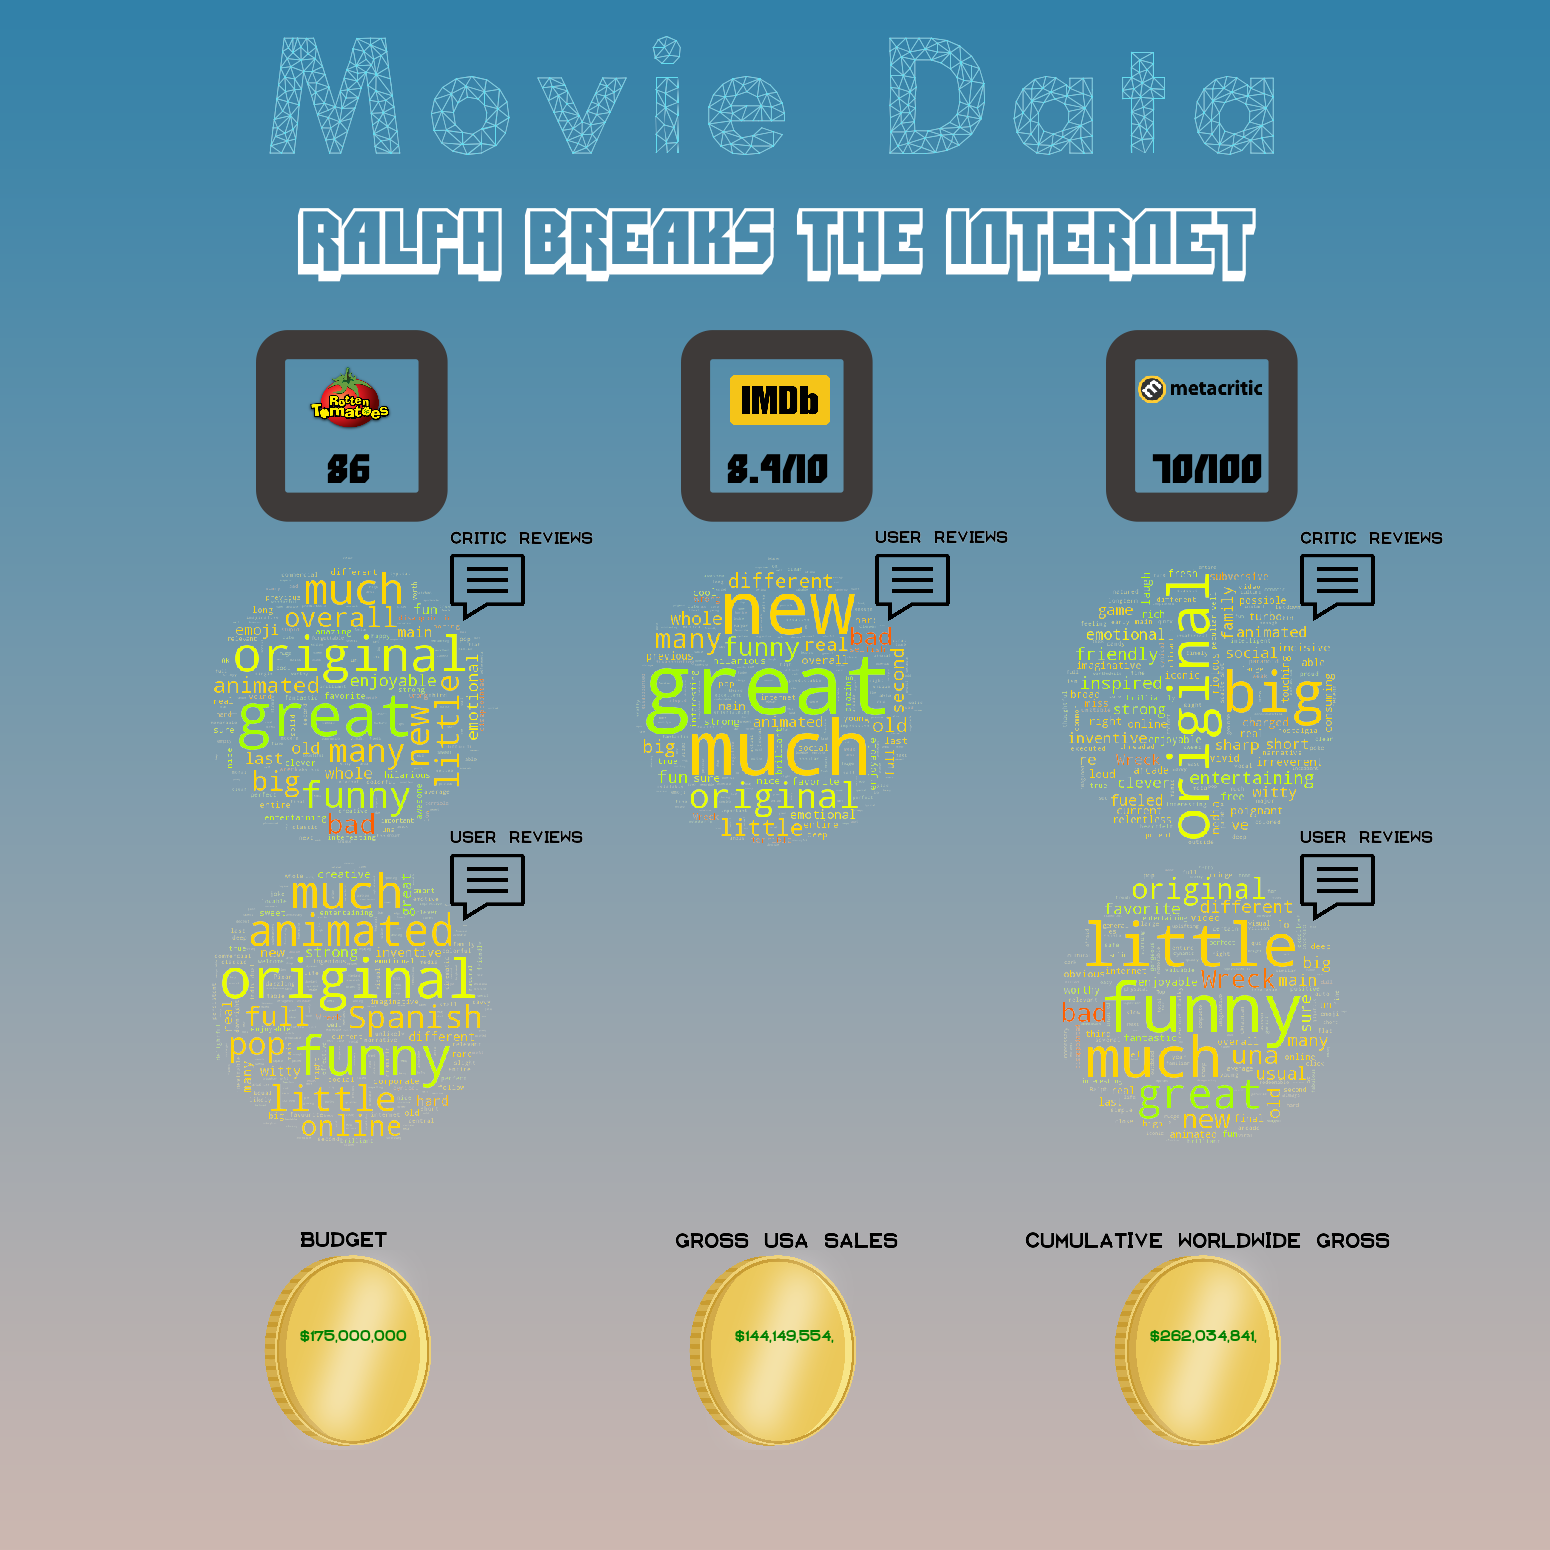

In [0]:
init_poster_maker('https://www.rottentomatoes.com/m/ralph_breaks_the_internet')